In [4]:
# importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data= pd.read_csv(r"D:\WORK\Diabetic-prediction-using-multiple-machine-learning-algorithms\diabetes_prediction_dataset.csv")

In [6]:
# top 5 rows of the dataset
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [7]:
# checking null values
data.isnull()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False


In [8]:
# describe data set
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [9]:
data.shape

(100000, 9)

Exploratory Data Analysis (EDA)

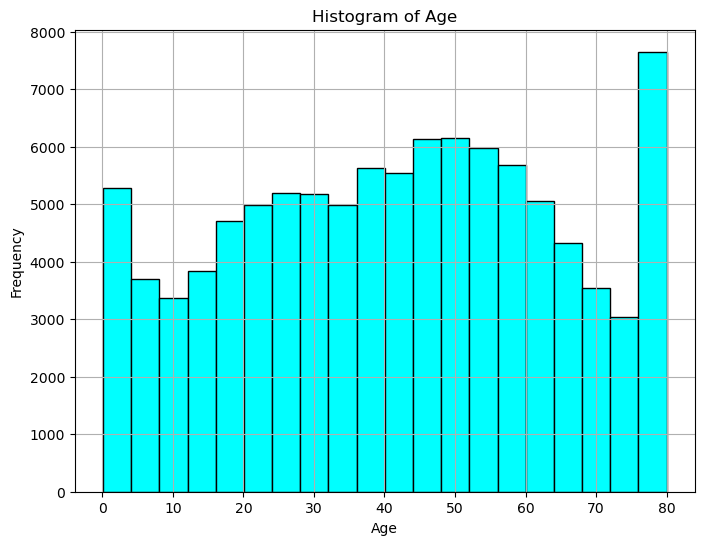

In [10]:
plt.figure(figsize=(8,6))
plt.hist(data['age'], bins=20, edgecolor="black", color="cyan")
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

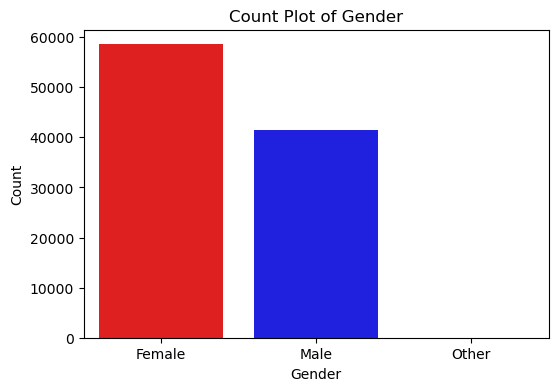

In [11]:
# Defining colors for every gender catagory
colors = {'Male': 'blue', 'Female': 'red', 'Other': 'green'}

plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=data, palette=colors)
plt.title('Count Plot of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

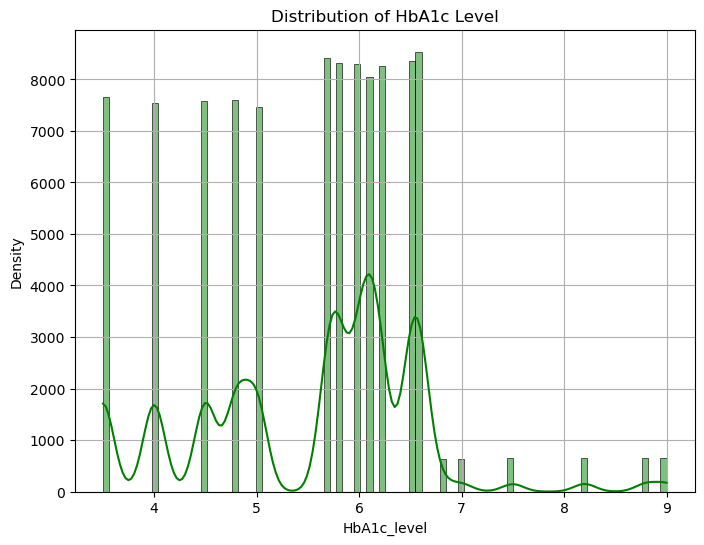

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(data['HbA1c_level'],kde=True, color= 'green')
plt.title('Distribution of HbA1c Level')
plt.xlabel('HbA1c_level')
plt.ylabel('Density')
plt.grid(True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

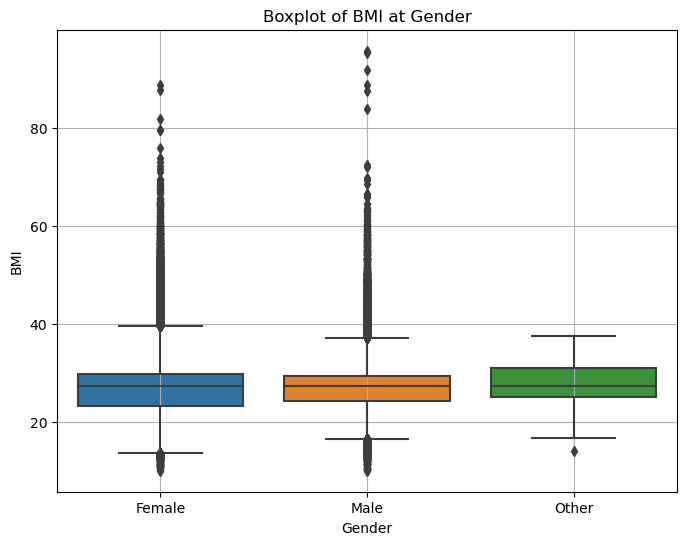

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y= 'bmi', data=data)
plt.title('Boxplot of BMI at Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.grid(True)
plt.show

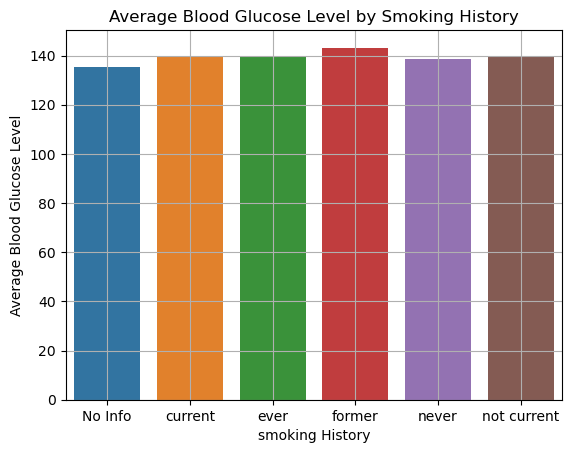

In [14]:
# Defineing the color palatte for several smoking history categories
avg_glucose_by_smoking = data.groupby('smoking_history')['blood_glucose_level'].mean().reset_index()
sns.barplot(x='smoking_history', y='blood_glucose_level', data=avg_glucose_by_smoking)
plt.title('Average Blood Glucose Level by Smoking History')
plt.xlabel('smoking History')
plt.ylabel('Average Blood Glucose Level')
plt.grid(True)
plt.show()

In [15]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [16]:
from sklearn.preprocessing import LabelEncoder

#transforming categorical to numerical columns
data ['gender'] = LabelEncoder().fit_transform(data ['gender'])
data ['smoking_history'] = LabelEncoder().fit_transform(data ['smoking_history'])


In [17]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


Liner Regression model

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# separating the features (x) and target variable(y)
x = data.drop('blood_glucose_level', axis=1) # features
y = data['blood_glucose_level'] # target variable

#splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
#print(f'x_train, x_test, y_train, y_test : {x_train, x_test, y_train, y_test}')

# standardizing the featurs
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
#print(f'x_train_scaled, x_test_scaled:{x_train_scaled, x_test_scaled}')

# Training the linear regresiion model
model = LinearRegression()
model.fit(x_train_scaled, y_train)

# making predictions on the testing set
y_pred = model.predict(x_test_scaled)

# evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R^2 Score: {r2:.4f}')


Mean Absolute Error (MAE): 30.7237
Mean Squared Error (MSE): 1367.3011
R^2 Score: 0.1717


Support Vector Regression (SVR)

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

# seperating features (x) and target variable (y)
x = data.drop('blood_glucose_level', axis=1) #features
y = data['blood_glucose_level'] #target variable

#splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# standardizing the features (recommended for SVR)
scalar = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Training the SVR model
model = SVR(kernel='rbf') # radial basis function (RBF) kernel is commonly used
model.fit(x_train_scaled, y_train)

# making predictions on the testing set
y_pred = model.predict(x_test_scaled)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f'Mean Absolute ERROR (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R^2 Score:{r2:.4f}')



Mean Absolute ERROR (MAE): 30.0247
Mean Squared Error (MSE): 1507.7785
R^2 Score:0.0866


Logestic regression

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separating features (X) and target variable (y)
X = data.drop('diabetes', axis=1)  # Features
y = data['diabetes']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardizing the features (recommended for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Making predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluating the model
accuracy_lr = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic Regression: {accuracy_lr:.4f}')

# Printing the classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Printing confusion matrix
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy of Logistic Regression: 0.9584

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     22850
           1       0.87      0.61      0.72      2150

    accuracy                           0.96     25000
   macro avg       0.92      0.80      0.85     25000
weighted avg       0.96      0.96      0.96     25000


Confusion Matrix:
[[22647   203]
 [  838  1312]]


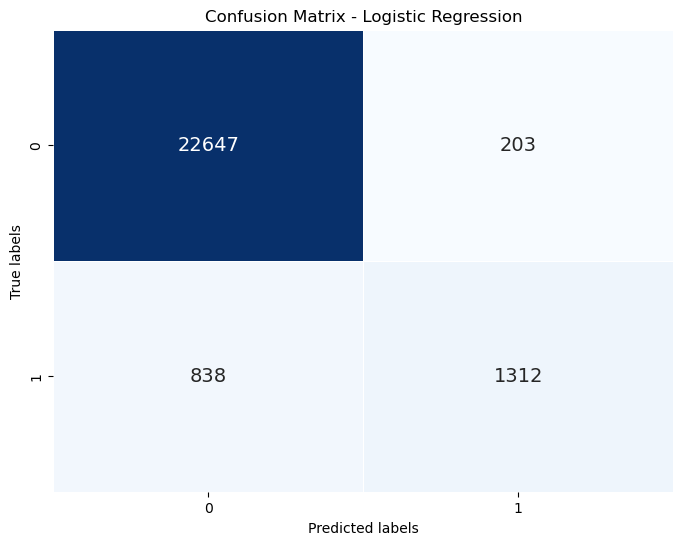

In [21]:
from sklearn.metrics import confusion_matrix

# Computing the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'fontsize': 14}, linewidths=0.5)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separating features (X) and target variable (y)
X = data.drop('diabetes', axis=1)  # Features
y = data['diabetes']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Training the Random Forest Classifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy_rfc = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest Classifier: {accuracy_rfc:.4f}')

# Printing classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Printing confusion matrix
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy of Random Forest Classifier: 0.9701

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     22850
           1       0.96      0.68      0.80      2150

    accuracy                           0.97     25000
   macro avg       0.96      0.84      0.89     25000
weighted avg       0.97      0.97      0.97     25000


Confusion Matrix:
[[22787    63]
 [  684  1466]]


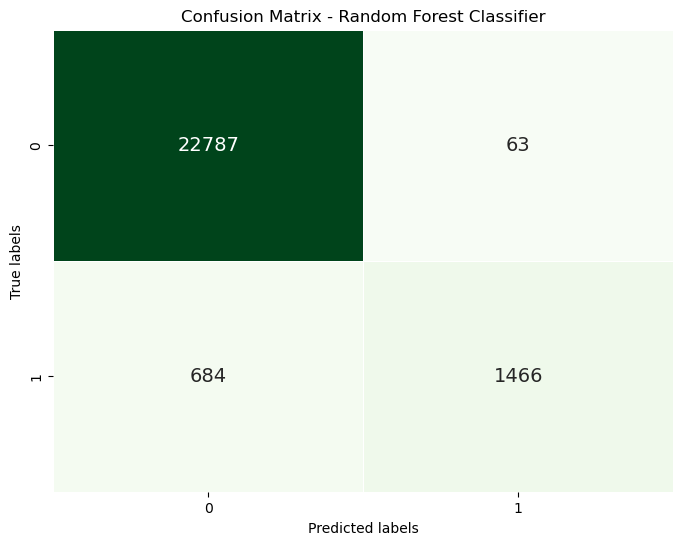

In [24]:
# Computing confusion matrix
cm_rf = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix heatmap for Random Forest Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False,
            annot_kws={'fontsize': 14}, linewidths=0.5)
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

K-means Clustring

c:\Users\jagad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


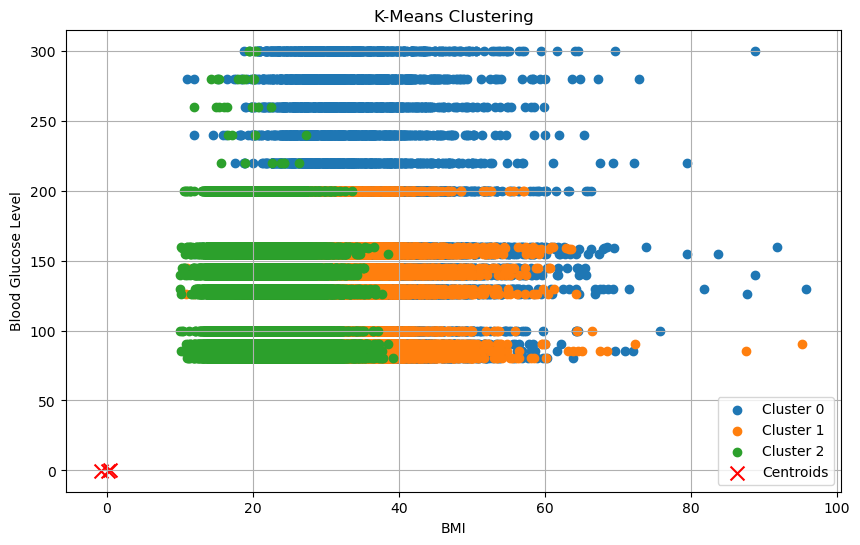

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Choosing relevant columns for clustering (numerical columns)
X = data[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Performing K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)

# Adding cluster labels to the DataFrame
data['cluster'] = clusters

# Plotting the clusters
plt.figure(figsize=(10, 6))

# Scatter plot for each cluster
for cluster in sorted(data['cluster'].unique()):
    plt.scatter(data[data['cluster'] == cluster]['bmi'],
                data[data['cluster'] == cluster]['blood_glucose_level'],
                label=f'Cluster {cluster}')

# Plotting centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 1], centroids[:, 3], marker='x', color='r', s=100, label='Centroids')

plt.title('K-Means Clustering')
plt.xlabel('BMI')
plt.ylabel('Blood Glucose Level')
plt.legend()
plt.grid(True)
plt.show()

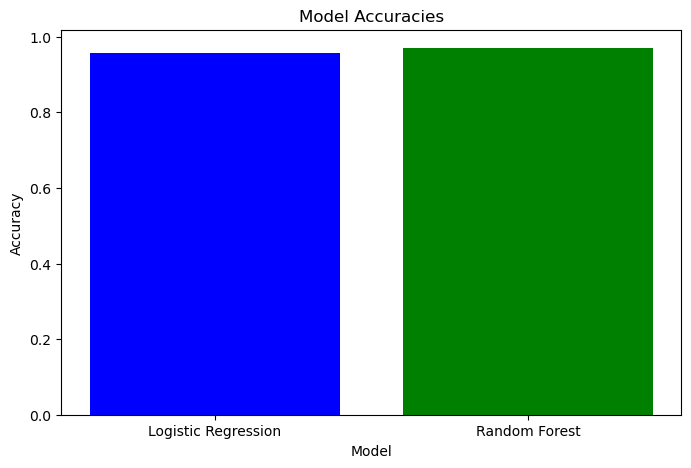

In [26]:
# Model names and their respective accuracies
models = ['Logistic Regression', 'Random Forest']
accuracies = [accuracy_lr, accuracy_rfc]

# Plotting the accuracies
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()